In [2]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
from scipy import stats
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching
import nbformat 
# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
# problem with these imports
# from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
#                             precision_score, recall_score, roc_auc_score,\
#                             plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

In [9]:
#upload the csv and declare its name to = the csv
#for this course we will name the dataframe 'stroke', but you can change it to df or anything else you want.
#Find the file path to the .csv
#Then use code below to read .csv
diabetes = pd.read_csv('C:/Users/Shad/.pyenv/PProjects/diabetes-analysis/data/cleandata.csv')
diabetesv2 = pd.read_csv('C:/Users/Shad/.pyenv/PProjects/diabetes-analysis/data/diabetic_data.csv')
diabetesv3 = pd.read_csv('C:/Users/Shad/.pyenv/PProjects/diabetes-analysis/data/onlyreadm.csv')

In [26]:
# Calculate the correlation coefficient between each variable and A1Cresult
correlations = diabetes.corr()['readmitted']
threshold = 0.3

# Identify the variables with a correlation coefficient above the threshold
relevant_variables = correlations[abs(correlations) > threshold].index.tolist()

# Print the relevant variables
print(relevant_variables)
# Print the correlation coefficients for each variable
print(correlations)
# Set a correlation coefficient threshold of 0.3

['readmitted']
Unnamed: 0                 -0.008991
encounter_id               -0.008516
patient_nbr                 0.007900
race                        0.003971
gender                     -0.002908
age                         0.017638
admission_type_id          -0.011654
discharge_disposition_id    0.050572
admission_source_id         0.005818
time_in_hospital            0.044197
medical_specialty          -0.010204
num_lab_procedures          0.020359
num_procedures             -0.012219
num_medications             0.038433
number_outpatient           0.018890
number_emergency            0.060744
number_inpatient            0.165143
number_diagnoses            0.049518
max_glu_serum               0.011283
A1Cresult                  -0.017584
metformin                  -0.023729
repaglinide                 0.009432
nateglinide                 0.000304
chlorpropamide             -0.005043
glimepiride                -0.007018
acetohexamide              -0.001111
glipizide              

In [24]:
# Calculate the correlation coefficient between each variable and A1Cresult
correlations = diabetes.corr()['A1Cresult']
threshold = 0.1

# Identify the variables with a correlation coefficient above the threshold
relevant_variables = correlations[abs(correlations) > threshold].index.tolist()

# Print the relevant variables
print(relevant_variables)
# Print the correlation coefficients for each variable
print(correlations)
# Set a correlation coefficient threshold of 0.3

['age', 'num_lab_procedures', 'A1Cresult', 'insulin', 'change']
Unnamed: 0                 -0.001682
encounter_id                0.000588
patient_nbr                -0.009446
race                       -0.014265
gender                      0.022821
age                        -0.134532
admission_type_id          -0.047172
discharge_disposition_id   -0.021456
admission_source_id         0.003922
time_in_hospital            0.060271
medical_specialty          -0.011261
num_lab_procedures          0.247601
num_procedures             -0.012089
num_medications             0.017699
number_outpatient          -0.023382
number_emergency           -0.008967
number_inpatient           -0.058417
number_diagnoses           -0.024045
max_glu_serum              -0.055708
A1Cresult                   1.000000
metformin                   0.051162
repaglinide                 0.026928
nateglinide                 0.000252
chlorpropamide             -0.003777
glimepiride                 0.022290
acetohexami

In [23]:
# Calculate the correlation coefficient between each variable and A1Cresult
correlations = diabetes.corr()['max_glu_serum']
threshold = 0.3

# Identify the variables with a correlation coefficient above the threshold
relevant_variables = correlations[abs(correlations) > threshold].index.tolist()

# Print the relevant variables
print(relevant_variables)
# Print the correlation coefficients for each variable
print(correlations)
# Set a correlation coefficient threshold of 0.3

['admission_type_id', 'admission_source_id', 'max_glu_serum']
Unnamed: 0                 -0.163399
encounter_id               -0.145985
patient_nbr                -0.083989
race                        0.060255
gender                     -0.002605
age                         0.024984
admission_type_id           0.375553
discharge_disposition_id    0.042696
admission_source_id         0.439956
time_in_hospital            0.023549
medical_specialty          -0.001140
num_lab_procedures         -0.140312
num_procedures             -0.073110
num_medications            -0.005981
number_outpatient           0.050151
number_emergency            0.034601
number_inpatient            0.030031
number_diagnoses           -0.046055
max_glu_serum               1.000000
A1Cresult                  -0.055708
metformin                  -0.026428
repaglinide                -0.015631
nateglinide                -0.017475
chlorpropamide              0.003667
glimepiride                -0.030701
acetohexamide

Silhouette score: 0.231
Within-cluster sum of squares: 211100.024


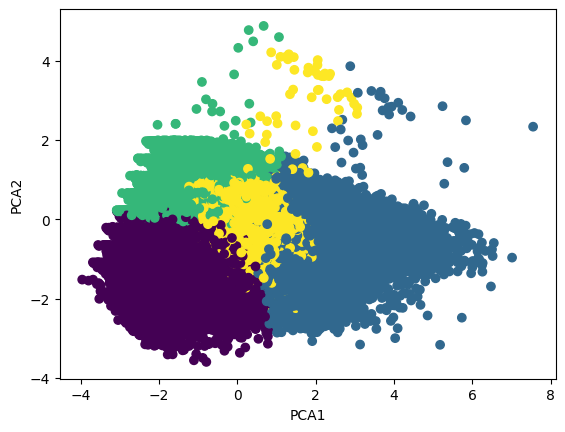

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
features = ['time_in_hospital', 'num_lab_procedures', 'number_diagnoses', 'num_medications', 'readmitted']

# Data preprocessing
# Handle missing values
diabetes_clean = diabetes[features].dropna()

# Scale numerical features
num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
scaler = StandardScaler()
diabetes_clean[num_cols] = scaler.fit_transform(diabetes_clean[num_cols])

# One-hot encode categorical features
cat_cols = ['readmitted']
diabetes_encoded = pd.get_dummies(diabetes_clean, columns=cat_cols)

# Apply k-means clustering
k = 4  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(diabetes_encoded)

# Compute Silhouette score
silhouette_avg = silhouette_score(diabetes_encoded, cluster_labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

# Compute WSS
wss = kmeans.inertia_
print(f"Within-cluster sum of squares: {wss:.3f}")
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(diabetes_encoded)

# Plot the scatter plot
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


Silhouette score: 0.250
Within-cluster sum of squares: 245211.248


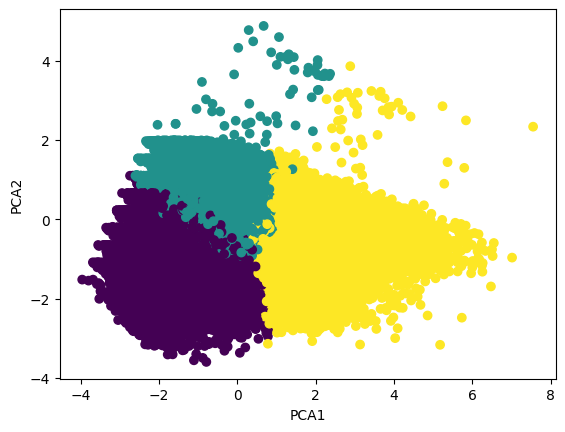

In [30]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
features = ['time_in_hospital', 'num_lab_procedures', 'number_diagnoses', 'num_medications', 'readmitted']

# Data preprocessing
# Handle missing values
diabetes_clean = diabetes[features].dropna()

# Scale numerical features
num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
scaler = StandardScaler()
diabetes_clean[num_cols] = scaler.fit_transform(diabetes_clean[num_cols])

# One-hot encode categorical features
cat_cols = ['readmitted']
diabetes_encoded = pd.get_dummies(diabetes_clean, columns=cat_cols)

# Apply k-means clustering
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(diabetes_encoded)

# Compute Silhouette score
silhouette_avg = silhouette_score(diabetes_encoded, cluster_labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

# Compute WSS
wss = kmeans.inertia_
print(f"Within-cluster sum of squares: {wss:.3f}")
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(diabetes_encoded)

# Plot the scatter plot
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()